In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
db=pd.read_csv("./data.csv",index_col='car_ID')

In [3]:
#Converting strings to integers
fuelmap={'gas':0,'diesel':1}
db.fueltype=db.fueltype.replace(fuelmap)

aspmap={'std':0,'turbo':1}
db.aspiration=db.aspiration.replace(aspmap)

doormap={'four':4,'two':2}
db.doornumber=db.doornumber.replace(doormap)

wheelmap={'fwd':0,'rwd':1,'4wd':2}
db.drivewheel=db.drivewheel.replace(wheelmap)

locmap={'front':0,'rear':1}
db.enginelocation=db.enginelocation.replace(locmap)

fsmap={'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}
db.fuelsystem=db.fuelsystem.replace(fsmap)

bodymap={'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}
db.carbody=db.carbody.replace(bodymap)

emap={'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}
db.enginetype=db.enginetype.replace(emap)

c_map={'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12}
db.cylindernumber=db.cylindernumber.replace(c_map)

#Dropping the CarName Feature
db=db.drop(['CarName'],axis=1)

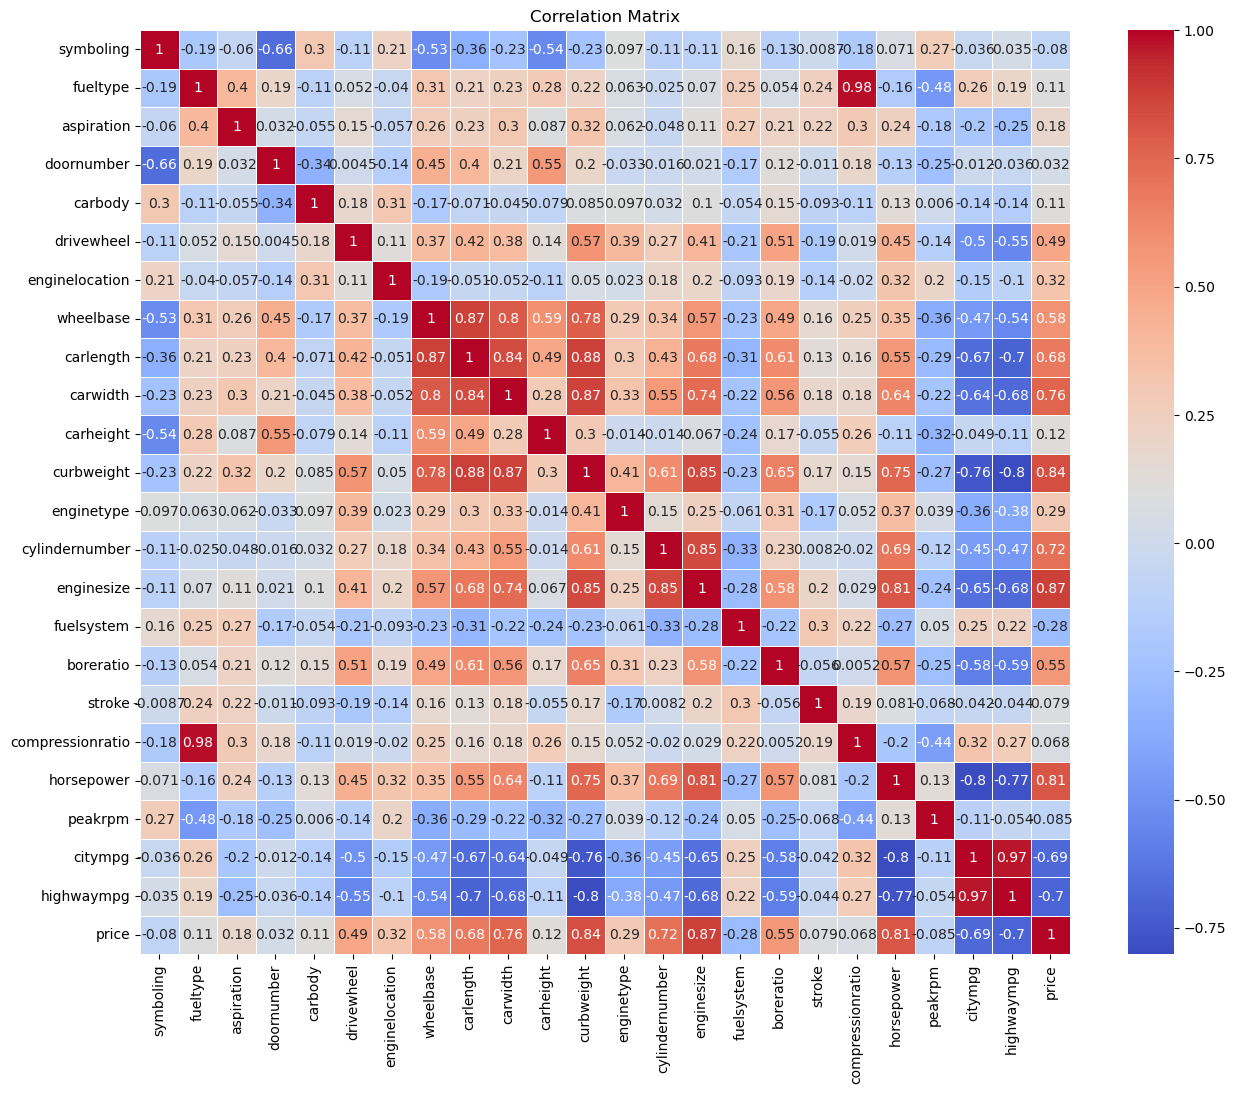

In [4]:
#Correlation matrix to figure out which features to drop
c_mat=db.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(c_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [5]:
#Dropping all the columns that are in the range (-0.1,0.1)
db=db.drop(['symboling', 'doornumber', 'stroke', 'compressionratio', 'peakrpm'],axis=1)

In [6]:
#Creating independent and dependent vectors
X=db.drop("price", axis=1)
y=db.price
X=X.to_numpy()
y=y.to_numpy()

In [7]:
#Mean Normalisation and Feature Scaling
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X-X_mean) #Mean Normalisation
X=X/X_std #Feature Scaling

In [8]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=54)

In [9]:
#Defining the hypothesis
def predict(features,weights,bias):
    predictions=np.dot(features,weights)+bias
    predictions = np.round(predictions, 2)
    return predictions

In [10]:
#Defining the gradient descent and returning cost history for Epoch graph
def grad(X,y,W,b,n,lr,thresh):
    prev_cost = float('inf')
    cost_hist=[]
    
    while True:
        preds=predict(X,W,b)
        err = preds - y

        dW = 1/n* np.dot(X.T, err)
        db = 1/n*np.sum(err)

        W-=lr*dW
        b-=lr*db
        cost =(1/(2*n))*np.sum(err ** 2)
        cost_hist.append(cost)
        if (abs(prev_cost - cost)<thresh):
            break
        prev_cost = cost
    return W,b,cost_hist

In [11]:
#Defining R-square calculating method
def score(y, preds):
    y_mean = np.mean(y)
    tss = np.sum((y-y_mean) ** 2)
    rss = np.sum((y-preds) ** 2)
    score = 1-(rss/tss)
    return score

R2 score:0.8834961669246415


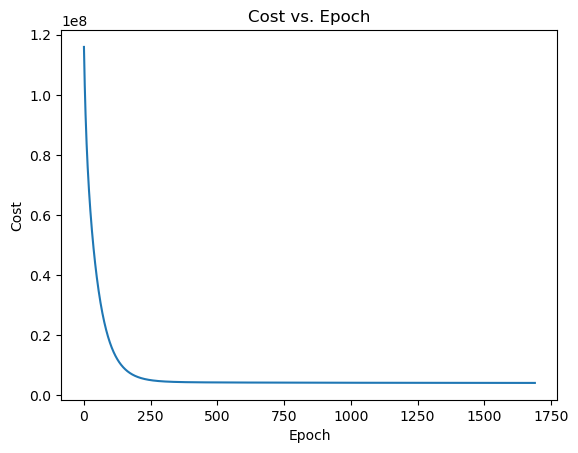

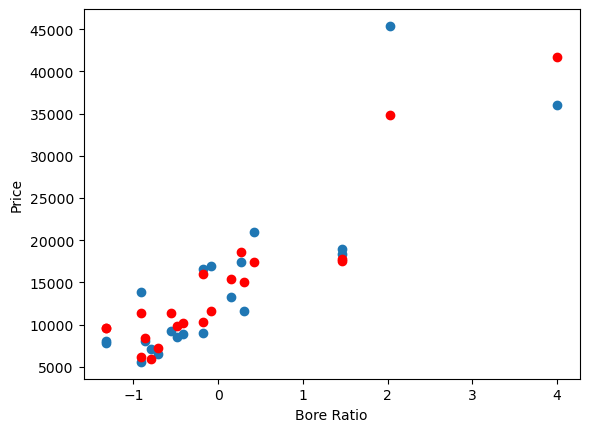

In [12]:
#Setting the init values and plotting Cost vs Epoch and 1 example feature (bore-ratio) vs predicted value graph
lr=0.01
thresh=50
n,col = X_train.shape
W = np.zeros(col)
b= 0

W,b,cost_hist=grad(X_train,y_train,W,b,n,lr,thresh)
res=predict(X_test,W,b)
print(f"R2 score:{score(y_test,res)}")

plt.plot(range(len(cost_hist)),cost_hist)
plt.title('Cost vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()
    
X_test=pd.DataFrame(X_test)
plt.scatter(X_test[15], y_test)
plt.scatter(X_test[15], res, color='red')
plt.xlabel("Bore Ratio")
plt.ylabel("Price")
plt.show()